In [17]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from fastai.vision.data import *
import warnings
warnings.filterwarnings("ignore")


In [18]:
image_directory= 'dataset/'
path = 'dataset/'
no_images=os.listdir(image_directory+ 'no/')
yes_images=os.listdir(image_directory+ 'yes/')

dataset=[]
label=[]

In [19]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

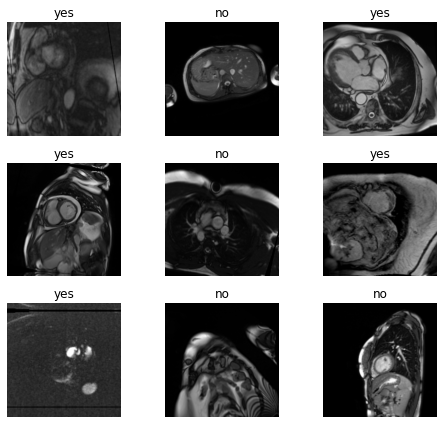

In [20]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [21]:
data

ImageDataBunch;

Train: LabelList (37906 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no,no,no,no,no
Path: dataset;

Valid: LabelList (9476 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yes,no,no,no,yes
Path: dataset;

Test: None

In [6]:
print(data.classes)
len(data.classes)
data.c

['no', 'yes']


2

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('datasets/'),path = Path("."))

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


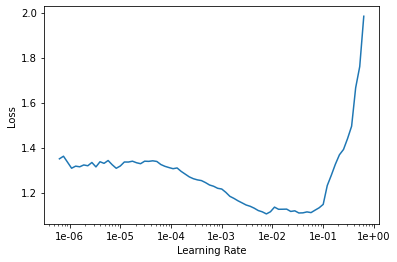

In [8]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [9]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

epoch,train_loss,valid_loss,accuracy,time
0,0.305248,0.188660,0.916104,2:09:14
1,0.247636,0.119086,0.952406,2:01:55
2,0.216777,0.136253,0.943753,2:01:36
3,0.252641,0.174891,0.923491,2:01:26
4,0.252522,0.158170,0.933305,2:01:08
5,0.337634,0.317986,0.900063,3:29:46
6,0.257290,0.144960,0.945863,3:52:13
7,0.392385,1.405641,0.766779,2:21:13
8,0.335873,0.504006,0.910827,2:05:26
9,0.271992,0.183424,0.935205,2:07:59


In [10]:
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.068819,0.037811,0.986070,2:29:53
1,0.075012,0.102776,0.959054,2:29:47
2,0.085356,0.048621,0.983537,2:28:51
3,0.080009,0.065280,0.976572,2:28:44
4,0.078434,0.115979,0.949451,2:31:53
5,0.064292,0.035771,0.986598,2:26:58
6,0.052979,0.043052,0.984171,2:29:50
7,0.049436,0.057277,0.979949,2:30:36
8,0.039592,0.023776,0.990608,2:28:25
9,0.032392,0.020770,0.992402,2:31:05


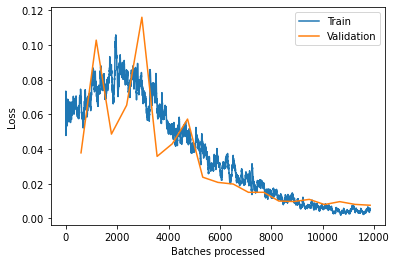

In [11]:
learn.recorder.plot_losses()

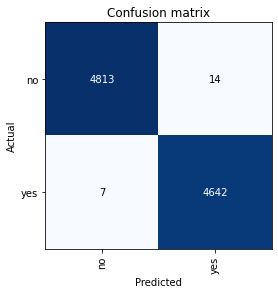

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

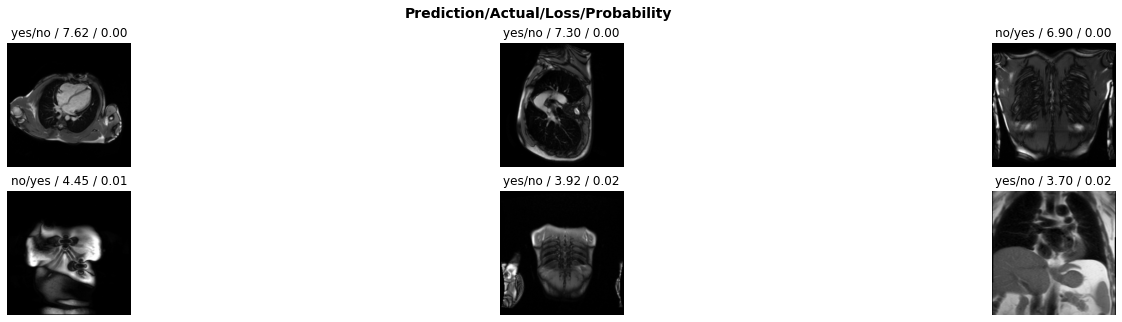

In [13]:
interp.plot_top_losses(6,figsize = (25,5))

In [14]:
img = open_image('/dataset/no/img0001--2.85338.jpg')
print(learn.predict(img)[0])

FileNotFoundError: [Errno 2] No such file or directory: '/dataset/no/img0001--2.85338.jpg'